**PORTFOLIO MANAGEMENT GROUP WORK PROJECT 1**

---



**INTRODUCTION**:

In the world of economics and finance it is very important to have an understanding of the connection between risk and returns and it is even more important to have a way to measure this connection and this is where the Capital Asset Pricing Model (CAPM) model comes to help us. It is used to describe the relationship between systematic risk and expected return for a given asset. It helps with the pricing of risky securities, generating expected returns for assets given the risk of those assets and calculating costs of capital.
The next extensions and refinements of the model lead to the Fama_french three and later five models  which includes market risk, size, and value factors, and incorporates profitability and investment factors respectively.  


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm

from google.colab import files

Factors are everywhere. Professor French (of Fama-French fame) now makes available historical factors. Please see:
https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/data_library.html

In [ ]:

upload_ff3 = files.upload()

In [5]:
factor_returns_three = pd.read_csv('/content/ff3.txt', sep='\s+', skiprows=0)
factor_returns_three.head()

,Date,Mkt-RF,SMB,HML,RF
0,19260701,0.10,-0.25,-0.27,0.009
1,19260702,0.45,-0.33,-0.06,0.009
2,19260706,0.17,0.30,-0.39,0.009
3,19260707,0.09,-0.58,0.02,0.009
4,19260708,0.21,-0.38,0.19,0.009


In [ ]:

upload_ff5 = files.upload()

Saving ff5.txt to ff5 (1).txt


In [6]:
factor_returns_five = pd.read_csv('/content/ff5.txt', sep='\s+', skiprows=0)
factor_returns_five.head()

,Date,Mkt-RF,SMB,HML,RMW,CMA,RF
0,19630701,-0.67,0.02,-0.35,0.03,0.13,0.012
1,19630702,0.79,-0.28,0.28,-0.08,-0.21,0.012
2,19630703,0.63,-0.18,-0.10,0.13,-0.25,0.012
3,19630705,0.40,0.09,-0.28,0.07,-0.30,0.012
4,19630708,-0.63,0.07,-0.20,-0.27,0.06,0.012


**Step 2: Select a 3-year time period and use daily data.**

a. Import, structure, and graph the daily factor returns.


Correcting the date type three factor dataset

In [7]:
# Find the index of the row with 'Date' value as "Copyright"
index_to_drop = factor_returns_three[factor_returns_three['Date'] == 'Copyright'].index

# Drop the row
factor_returns_three = factor_returns_three.drop(index_to_drop)

# Convert 'Date' column to datetime format
factor_returns_three['Date'] = pd.to_datetime(factor_returns_three['Date'],
                                              format='%Y%m%d'
                                              )


Correcting the date type five factor dataset


In [8]:
# Convert 'Date' column to datetime format
factor_returns_five['Date'] = pd.to_datetime(factor_returns_five['Date'],
                                             format='%Y%m%d'
                                             )

Selecting the last date for the last three years five factors

In [9]:
# Find the last 29 February 2024
last_29_feb_2024 = pd.Timestamp('2024-02-29')

# Calculate the start date for the last three years
start_date = last_29_feb_2024 - pd.DateOffset(years=3)

# Filter the DataFrame for dates within the last three years
factor_returns_three = factor_returns_three[factor_returns_three['Date'] >= start_date]

Selecting the last date for the last three years five factors

In [10]:
# Find the last 29 February 2024
last_29_feb_2024 = pd.Timestamp('2024-02-29')

# Calculate the start date for the last three years
start_date = last_29_feb_2024 - pd.DateOffset(years=3)

# Filter the DataFrame for dates within the last three years
factor_returns_five_last_three_years = factor_returns_five[factor_returns_five['Date'] >= start_date]

Plot the factor returns



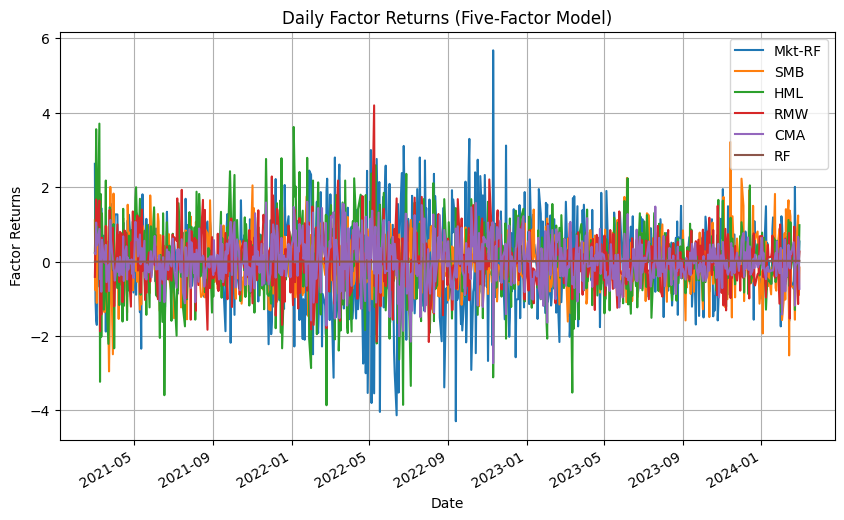

In [12]:
import matplotlib.pyplot as plt

# Create a copy of the DataFrame to avoid SettingWithCopyWarning
factor_returns_five_copy = factor_returns_five_last_three_years.copy()

# Convert 'SMB', 'HML', 'RMW', 'CMA', and 'RF' columns to numeric
factor_returns_five_copy['SMB'] = pd.to_numeric(factor_returns_five_copy['SMB'])
factor_returns_five_copy['HML'] = pd.to_numeric(factor_returns_five_copy['HML'])
factor_returns_five_copy['RMW'] = pd.to_numeric(factor_returns_five_copy['RMW'])
factor_returns_five_copy['CMA'] = pd.to_numeric(factor_returns_five_copy['CMA'])
factor_returns_five_copy['RF'] = pd.to_numeric(factor_returns_five_copy['RF'])

# Plot the time series for the five-factor model
factor_returns_five_copy.plot(x='Date',
                              y=['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA', 'RF'],
                              figsize=(10, 6)
                              )
plt.title('Daily Factor Returns (Five-Factor Model)')
plt.xlabel('Date')
plt.ylabel('Factor Returns')
plt.grid(True)
plt.show()

The daily factor returns data is imported for the Fama-French five-factor model. It contains data for all 5 factors. A 3-year time period is selected with the end date as '2024-02-29'. Then the factor returns are plotted over the time period.

b. Collect and compute correlations of the changes in the factor returns.

In [13]:
# Drop the 'Date' column
factor_returns_five_copy_changes = factor_returns_five_copy.diff().drop(columns=['Date']).dropna()

# Compute correlations of the changes in factor returns
correlations = factor_returns_five_copy_changes.corr()

# Print correlations
print("Correlations of the changes in factor returns:")
print(correlations)


Correlations of the changes in factor returns:
          Mkt-RF       SMB       HML       RMW       CMA        RF
Mkt-RF  1.000000  0.247804 -0.367205 -0.325623 -0.475537 -0.000486
SMB     0.247804  1.000000  0.110178 -0.418768 -0.033841  0.032491
HML    -0.367205  0.110178  1.000000  0.427404  0.734792  0.036420
RMW    -0.325623 -0.418768  0.427404  1.000000  0.355949  0.014004
CMA    -0.475537 -0.033841  0.734792  0.355949  1.000000  0.073445
RF     -0.000486  0.032491  0.036420  0.014004  0.073445  1.000000


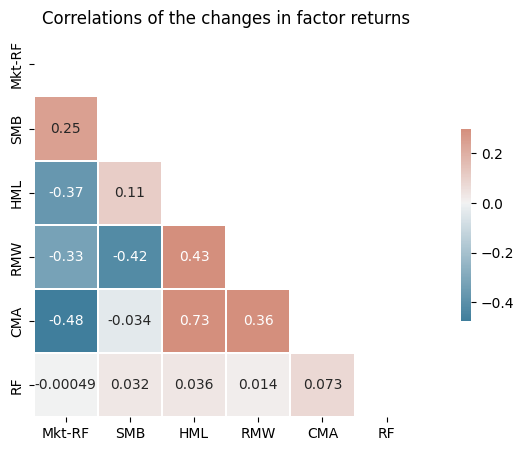

In [14]:
corr = correlations

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 5))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr,
            mask=mask,
            cmap=cmap,
            annot=True,
            vmax=.3,
            center=0,
            square=True,
            linewidths=.1,
            cbar_kws={"shrink": .5}
            )
plt.title('Correlations of the changes in factor returns')

plt.show()


From the figure, we can see that Market factor and CMA factor is the most negatively correlated among the 5 factors and HML factor and CMA factor are the most positively correlated.

c. Collect economic data of your choice during that 2-year period:

[*********************100%%**********************]  1 of 1 completed


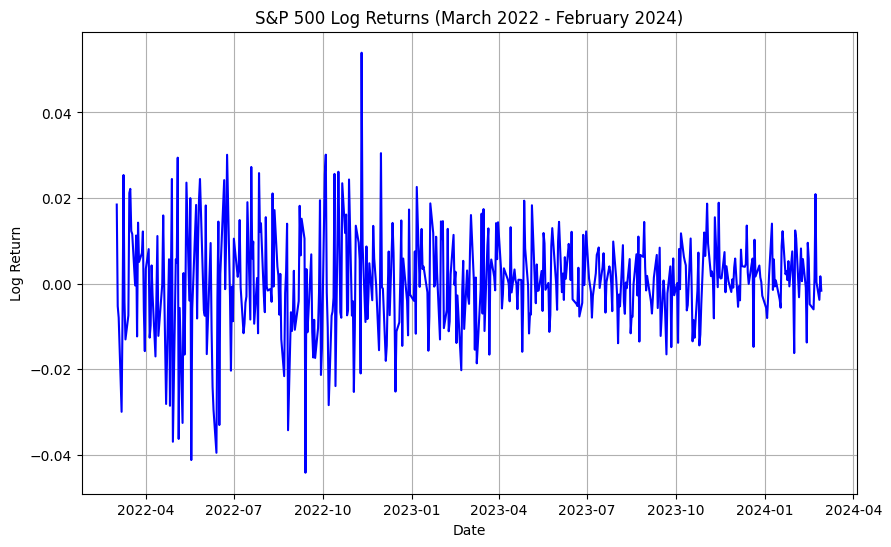

In [15]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# Define the ticker symbol for S&P 500 (SPY)
ticker = '^GSPC'

# Define the start and end dates
start_date = '2022-03-01'
end_date = '2024-02-29'

# Download the data
sp500_data = yf.download(ticker,
                         start=start_date,
                         end=end_date
                         )

# Compute daily log returns
sp500_data['Log_Return'] = sp500_data['Adj Close'].pct_change().apply(lambda x: np.log(1 + x))

# Plot the log returns
plt.figure(figsize=(10, 6))
plt.plot(sp500_data.index, sp500_data['Log_Return'], color='blue')
plt.title('S&P 500 Log Returns (March 2022 - February 2024)')
plt.xlabel('Date')
plt.ylabel('Log Return')
plt.grid(True)
plt.show()

We have collected economic data for a 2-year time period. The data we have chosen is from the S & P 500 Index (Standard and Poor’s 500). This shows the performance of 500 large-cap companies in the U.S. the log returns of S&P 500

**Step 3: Using the data, find the FF3 betas.**


a. Use LS and a robust version to run the regressions:

Download the Amazon stock and compute the log returns as response variable

In [16]:
import yfinance as yf
import pandas as pd
from datetime import datetime, timedelta

# Calculate the start date (three years ago from February 29, 2024)
start_date = datetime(2024, 2, 29) - timedelta(days=3*365)

# Download Amazon stock data from Yahoo Finance
amzn_data = yf.download('AMZN',
                        start=start_date,
                        end='2024-02-29')

# Reset index to include 'Date' as a regular column
amzn_data.reset_index(inplace=True)

# Calculate daily log returns using adjusted close price
amzn_data['Log_Returns'] = np.log(amzn_data['Adj Close'] / amzn_data['Adj Close'].shift(1))
# Remove NaN values
amzn_data.dropna(inplace=True)

[*********************100%%**********************]  1 of 1 completed


Include the Date column

In [17]:
# Reset the index to bring the 'Date' column back as a regular column
factor_returns_three.reset_index(inplace=True)
factor_returns_five_copy.reset_index(inplace=True)
# Reorder the columns to include 'Date' as the first column
factor_returns_three = factor_returns_three[['Date', 'Mkt-RF', 'SMB', 'HML', 'RF']]
factor_returns_five_copy = factor_returns_five_copy[['Date', 'Mkt-RF', 'SMB', 'HML','RMW','CMA','RF']]

Join the two dataframe

In [18]:
# Merge the two dataframes on the 'Date' column
merged_data_three_factor = pd.merge(amzn_data,
                                    factor_returns_three,
                                    on='Date',
                                    how='inner'
                                    )

# Drop rows with missing values
merged_data_three_factor.dropna(inplace=True)

# Merge the two dataframes on the 'Date' column
merged_data_five_factor = pd.merge(amzn_data,
                                   factor_returns_five_copy,
                                   on='Date',
                                   how='inner'
                                   )

# Drop rows with missing values
merged_data_five_factor.dropna(inplace=True)

Perform with response variables as the amazon log daily returns

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, RANSACRegressor
import numpy as np

# Assuming 'X' contains the independent variables and 'y' contains the target variable
X = merged_data_three_factor[['Mkt-RF', 'SMB', 'HML']]
y = merged_data_three_factor['Log_Returns']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

# Fit Least Squares (LS) Regression model
model_ls = LinearRegression()
model_ls.fit(X_train, y_train)

# Fit Robust Regression (RANSAC) model
model_robust = RANSACRegressor()
model_robust.fit(X_train, y_train)

# Predictions
y_pred_ls = model_ls.predict(X_test)
y_pred_robust = model_robust.predict(X_test)


Amazon stock is selected and daily stock price for the same three year period is collected. Daily log returns of Amazon stock price is calculated and this is merged with the Fama-french three-factor returns collected. This data is used for finding the Fama-French three-factor betas.
The dataset is divided using a 80-20 split into training and testing datasets. Testing set is used for model evaluation.
Daily log returns of Amazon stock is taken as a dependent variable and the three factors - Mkt-RF, SMB and HML are taken as independent variables. Least square regression and Robust regression are done for calculating the FF3 betas.


b. Summarize the coefficients and model metrics:



In [20]:
import statsmodels.api as sm

# Convert the data types of input variables to numerical
X_train_numeric = X_train.apply(pd.to_numeric)
y_train_numeric = y_train.astype(float)

# Fit the linear regression model
model_ls = sm.OLS(y_train_numeric,
                  sm.add_constant(X_train_numeric)).fit()

# Print the summary of the model
print("Least Squares Model Summary:")
print(model_ls.summary())

# Fit the robust regression model (e.g., RANSAC)
ransac_model = sm.RLM(y_train_numeric,
                      sm.add_constant(X_train_numeric),
                      M=sm.robust.norms.HuberT()).fit()

# Print the summary of the robust model
print("\nRobust Model Summary:")
print(ransac_model.summary())

Least Squares Model Summary:
                            OLS Regression Results                            
Dep. Variable:            Log_Returns   R-squared:                       0.609
Model:                            OLS   Adj. R-squared:                  0.607
Method:                 Least Squares   F-statistic:                     310.6
Date:                Thu, 02 May 2024   Prob (F-statistic):          1.40e-121
Time:                        17:15:57   Log-Likelihood:                 1668.5
No. Observations:                 603   AIC:                            -3329.
Df Residuals:                     599   BIC:                            -3311.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0005  

The LS regression model gives coefficients for all 3 factors. These coefficients are the beta values for each factor for Amazon stock.  When all three factors are zero, the expected daily log returns of Amazon stock is -0.0005.
Robust regression model also gives coefficients for all 3 factors. This regression can handle outliers.  This model gives different coefficients. These coefficients are the beta values for each factor for Amazon stock. When all three factors are zero, the expected daily log returns of Amazon stock is -0.0005.

From the beta values, we have found using both regression models, we can see that Mkt-Rf is positive but it is less than 1. This implies that the risk is low. SMB and HML factors have negative betas. It shows that the Amazon stock chosen is a growth stock and it belongs to large-cap stocks.
For both regression models, we can see that the p-values for all three factors are 0, which implies that these coefficients are statistically significant. These factors are highly significant in these models.


**Step 4: Using the data, find the FF5 betas.**


a. Use the same regression methods, including how you divided the data into
training and testing.


In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, RANSACRegressor
import numpy as np

# Assuming 'X' contains the independent variables and 'y' contains the target variable
X = merged_data_five_factor[['Mkt-RF', 'SMB', 'HML','RMW','CMA']]
y = merged_data_five_factor['Log_Returns']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42
                                                    )

# Fit Least Squares (LS) Regression model
model_ls = LinearRegression()
model_ls.fit(X_train, y_train)

# Fit Robust Regression (RANSAC) model
model_robust = RANSACRegressor()
model_robust.fit(X_train, y_train)

# Predictions
y_pred_ls = model_ls.predict(X_test)
y_pred_robust = model_robust.predict(X_test)

Amazon stock is the selected stock. Daily log returns of Amazon stock price is calculated and this is merged with the Fama-french five-factor returns collected. This data is used for finding the Fama-French five-factor betas.
The dataset is again divided using a 80-20 split into training and testing datasets. Testing set is used for model evaluation.
Daily log returns of Amazon stock is taken as a dependent variable and the five factors - Mkt-RF, SMB, HML, RMW and CMA are taken as independent variables. Least square regression and Robust regression are done for calculating the FF5 betas.


b. Summarize the coefficients and model metrics:

In [22]:
import statsmodels.api as sm

# Convert the data types of input variables to numerical
X_train_numeric = X_train.apply(pd.to_numeric)
y_train_numeric = y_train.astype(float)

# Fit the linear regression model
model_ls = sm.OLS(y_train_numeric,
                  sm.add_constant(X_train_numeric)
                  ).fit()

# Print the summary of the model
print("Least Squares Model Summary:")
print(model_ls.summary())

# Fit the robust regression model (e.g., RANSAC)
ransac_model = sm.RLM(y_train_numeric,
                      sm.add_constant(X_train_numeric),
                      M=sm.robust.norms.HuberT()
                      ).fit()

# Print the summary of the robust model
print("\nRobust Model Summary:")
print(ransac_model.summary())


Least Squares Model Summary:
                            OLS Regression Results                            
Dep. Variable:            Log_Returns   R-squared:                       0.648
Model:                            OLS   Adj. R-squared:                  0.645
Method:                 Least Squares   F-statistic:                     219.3
Date:                Thu, 02 May 2024   Prob (F-statistic):          1.34e-132
Time:                        17:16:19   Log-Likelihood:                 1700.1
No. Observations:                 603   AIC:                            -3388.
Df Residuals:                     597   BIC:                            -3362.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0003  

The LS regression model gives coefficients for all 5 factors. These coefficients are the beta values for each factor for Amazon stock.  When all five factors are zero, the expected daily log returns of Amazon stock is -0.0003.

Robust regression model also gives coefficients for all 5 factors. This regression can handle outliers.  This model gives different coefficients. These coefficients are the beta values for each factor for Amazon stock. When all five factors are zero, the expected daily log returns of Amazon stock is -0.0003.
From the beta values, we have found using both regression models, we can see that Mkt-Rf is positive but it is less than 1. This implies that the risk is low. SMB, HML, RMW and CMA factors have negative betas. From SMB and HML betas, we can see that the Amazon stock chosen is a growth stock and it belongs to large-cap stocks. From RMW and CMA beta values, we can see that it is a low profitability stock and it follows aggressive investment strategies.


**Step 5: Using the daily factor data:**


c. Compute the correlation matrix of the factor returns

In [23]:
factor_returns_three_without_date = factor_returns_three.drop(columns=['Date'])
# Compute the correlation matrix
correlation_matrix = factor_returns_three_without_date.corr()

# Print the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
          Mkt-RF       SMB       HML        RF
Mkt-RF  1.000000  0.361755 -0.362545  0.026337
SMB     0.361755  1.000000 -0.192818  0.012906
HML    -0.362545 -0.192818  1.000000 -0.050252
RF      0.026337  0.012906 -0.050252  1.000000


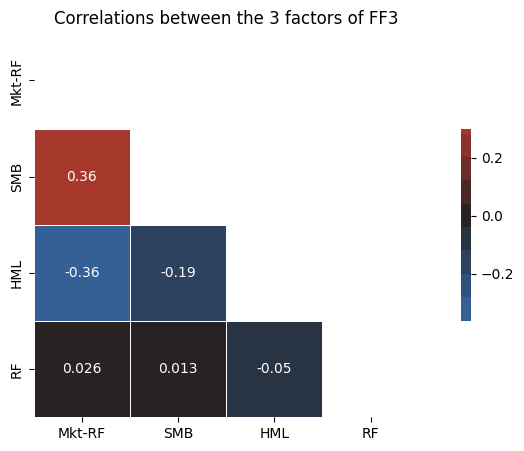

In [24]:
corr = correlation_matrix

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 5))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(250, 15, s=75, l=40,
                                  n=9, center="dark")

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr,
            mask=mask,
            cmap=cmap,
            annot=True,
            vmax=.3,
            center=0,
            square=True,
            linewidths=.5,
            cbar_kws={"shrink": .5}
            )

plt.title('Correlations between the 3 factors of FF3')

plt.show()

d. Compute the covariance matrix of the factor returns.

In [25]:
# Compute the covariance matrix
covariance_matrix = factor_returns_three_without_date.cov()

# Print the covariance matrix
print("Covariance Matrix:")
print(covariance_matrix)

Covariance Matrix:
          Mkt-RF       SMB       HML        RF
Mkt-RF  1.334268  0.306712 -0.434340  0.000273
SMB     0.306712  0.538754 -0.146788  0.000085
HML    -0.434340 -0.146788  1.075704 -0.000468
RF      0.000273  0.000085 -0.000468  0.000081


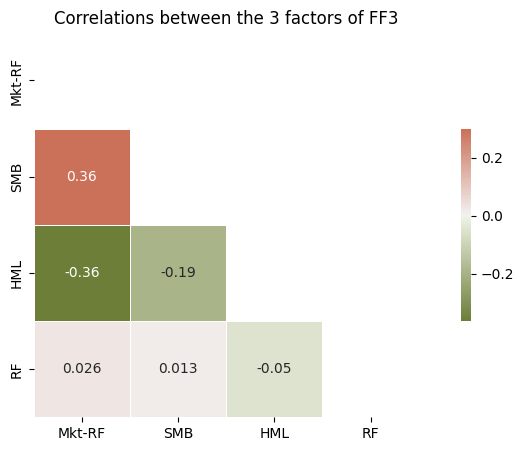

In [26]:
cova = covariance_matrix

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(cova, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 5))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(100, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr,
            mask=mask,
            cmap=cmap,
            annot=True,
            vmax=.3,
            center=0,
            square=True,
            linewidths=.5,
            cbar_kws={"shrink": .5}
            )

plt.title('Correlations between the 3 factors of FF3')

plt.show()

e. Compare and contrast the 2 matrices, emphasizing any important
differences.

The correlation matrix represents the linear relationship between variables and provides values ranging from -1 to 1, where 1 indicates a perfect positive correlation, -1 indicates a perfect negative correlation, and 0 indicates no correlation. By standardizing the values through division by the product of the standard deviations of the variables, it facilitates understanding the strength and direction of the linear relationship between variables, regardless of their scale. Moreover, the correlation matrix aids in identifying multicollinearity and assessing the strength of association between variables in terms of their relative variability.

In contrast, the covariance matrix depicts the joint variability between variables, with values being unbounded and dependent on the scale of the variables. It directly measures the extent to which two variables change together, offering insights into the direction and magnitude of the relationship between variables. However, unlike the correlation matrix, the covariance matrix does not standardize the values, making it challenging to compare relationships across variables with different scales. As a result, covariances can be difficult to interpret due to differences in the scale of variables.

# Step 6
With the additional 2 more factors in FF5 compared to FF3 we are getting more information that is used for predicting the returns of the portfolio so overall this is making the R^2, Adj. R^2 and F-statistics are getting higher which is telling us that the model is getting better by providing a more comprehensive view of the sources of risk and return in a portfolio. It can explain a larger portion of the variation in stock returns compared to the 3-factor model, making it a more accurate tool for evaluating portfolio performance and guiding investment decisions.
The CMA factor is incorporating the company’s behavior and attitude towards their politics about investing (aggressive or conservative) and this is how additional view over the company's behavior is provided.
The RMW factor brings to the table the view of how companies control their investment process (not only how much assets and how fast they are buying). Here we can classify how companies are controlling their investments and thus we can categorize them as robust and weak companies. This factor is bringing another field of comparison so it is no wonder that the FF5 model is better than FF3.


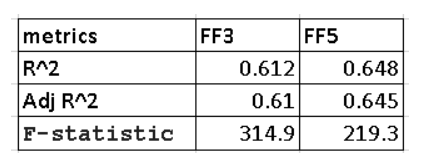

**Step  7**

f. Use Markowitz portfolio optimization to find a set of optimal allocations.
(Shorts are possible).

Step 1: Download stock prices of Google,Amazon,Microsoft,Tesla and Apple

In [27]:
import yfinance as yf
import pandas as pd

# Define the list of stock tickers
tickers = ['GOOG', 'AMZN', 'MSFT', 'TSLA', 'AAPL']

# Define the start and end dates
start_date = '2021-03-01'
end_date = '2024-02-29'

# Download historical stock price data
stock_data = yf.download(tickers,
                         start=start_date,
                         end=end_date)

# Extract adjusted closing prices
adj_close = stock_data['Adj Close']

[*********************100%%**********************]  5 of 5 completed


Step 2: Compute log returns from the ajusted close prices

In [28]:
log_returns = np.log(adj_close / adj_close.shift(1))
log_returns.dropna(inplace=True)
log_returns.reset_index(inplace=True)

Step 3: Compute the Covariance matrix and expected returns

In [29]:
# Assuming log_returns is your DataFrame with "Date" as a column and log returns for assets
# Drop the "Date" column to compute covariance matrix and means
log_returns_data = log_returns.drop(columns=["Date"])

# Compute covariance matrix
cov_matrix = log_returns_data.cov()

# Compute means (expected returns)
means = log_returns_data.mean()

print("Covariance Matrix:")
print(cov_matrix)

print("\nMeans (Expected Returns):")
print(means)


Covariance Matrix:
Ticker      AAPL      AMZN      GOOG      MSFT      TSLA
Ticker                                                  
AAPL    0.000291  0.000244  0.000228  0.000215  0.000329
AMZN    0.000244  0.000558  0.000313  0.000276  0.000390
GOOG    0.000228  0.000313  0.000393  0.000249  0.000290
MSFT    0.000215  0.000276  0.000249  0.000301  0.000278
TSLA    0.000329  0.000390  0.000290  0.000278  0.001340

Means (Expected Returns):
Ticker
AAPL    0.000488
AMZN    0.000127
GOOG    0.000369
MSFT    0.000754
TSLA   -0.000225
dtype: float64


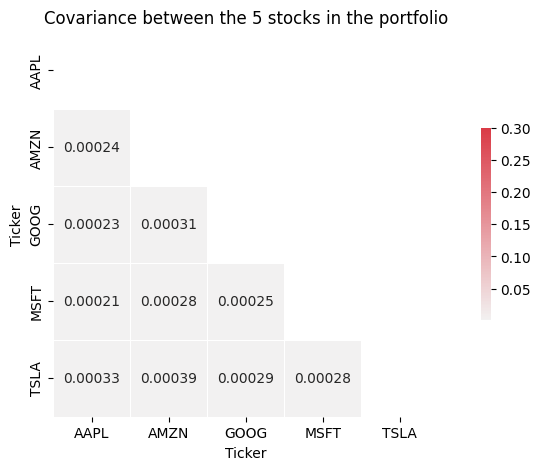

In [30]:
cova = cov_matrix

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(cova, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 5))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(50, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(cova,
            mask=mask,
            cmap=cmap,
            annot=True,
            vmax=.3,
            center=0,
            square=True,
            linewidths=.5,
            cbar_kws={"shrink": .5}
            )

plt.title('Covariance between the 5 stocks in the portfolio')

plt.show()

Step 4: Markowitz portfolio optimization to find a set of optimal allocations.
(Shorts are possible).

In [31]:
from scipy.optimize import minimize
import numpy as np

# Assuming log_returns is your DataFrame with log returns data and "Date" as one of the columns

# Drop the "Date" column to compute covariance matrix and means
log_returns_data = log_returns.drop(columns=["Date"])

# Compute covariance matrix
cov_matrix = log_returns_data.cov()

# Compute means (expected returns)
means = log_returns_data.mean()

# Define the objective function to minimize - portfolio variance
def portfolio_variance(weights, cov_matrix):
    return np.dot(weights.T, np.dot(cov_matrix, weights))

# Define the constraint function for sum of weights to be 1
def constraint_sum_of_weights(weights):
    return np.sum(weights) - 1

# Define the initial guess for weights
num_assets = len(log_returns_data.columns)
initial_guess = [1.0 / num_assets] * num_assets  # Equal weights for each asset



# Define the bounds for each weight (0, 1) since weights should sum up to 1
bounds = [(-1, 1) for _ in range(num_assets)]

# Define the constraints
constraints = [{'type': 'eq', 'fun': constraint_sum_of_weights},  # Sum of weights equals 1
               {'type': 'eq', 'fun': lambda w: np.dot(w, means)}]

# Minimize the objective function with the defined constraints
result = minimize(portfolio_variance,
                  initial_guess,
                  args=(cov_matrix,),
                  method='SLSQP',
                  bounds=bounds,
                  constraints=constraints)

# Get the optimal weights from the result
optimal_weights = result.x

# Print the optimal weights
print("Optimal Weights:")
for i, column in enumerate(log_returns_data.columns):
    print("{}: {:.4f}".format(column, optimal_weights[i]))

# Calculate portfolio return and volatility
portfolio_return = np.dot(optimal_weights, means)
portfolio_volatility = np.sqrt(portfolio_variance(optimal_weights, cov_matrix))

# Print the portfolio return and volatility
print("Portfolio Return: {:.4f}".format(portfolio_return))
print("Portfolio Volatility: {:.4f}".format(portfolio_volatility))

Optimal Weights:
AAPL: 0.0986
AMZN: 0.2960
GOOG: 0.1638
MSFT: -0.0476
TSLA: 0.4891
Portfolio Return: -0.0000
Portfolio Volatility: 0.0245


Append the portfolio returns based from the optimal weights

In [32]:
import numpy as np

# Assuming you have defined optimal_weights and cov_matrix earlier

# Define selected stocks
selected_stocks = log_returns[['AAPL', 'AMZN', 'GOOG', 'MSFT', 'TSLA']]

# Remove the last two elements from optimal_weights
optimal_weights_trimmed = optimal_weights[:-2]

# Calculate daily portfolio return using optimal weights for selected stocks
portfolio_daily_return = np.dot(selected_stocks,
                                optimal_weights
                                )

# Append the portfolio return per unit date to the log_returns DataFrame
log_returns['Portfolio_Return'] = portfolio_daily_return

# Select only the covariance matrix corresponding to the selected stocks
selected_cov_matrix = cov_matrix.loc[selected_stocks.columns, selected_stocks.columns]

# Calculate portfolio risk for each day using the selected covariance matrix
portfolio_daily_risk = np.sqrt(np.dot(np.dot(selected_stocks,
                                             selected_cov_matrix
                                             ),
                                      selected_stocks.T
                                      ).diagonal())

# Append the portfolio risk per unit date to the log_returns DataFrame
log_returns['Portfolio_Volatility'] = portfolio_daily_risk

# Display the updated DataFrame
print(log_returns.head())


Ticker       Date      AAPL      AMZN      GOOG      MSFT      TSLA  \
0      2021-03-02 -0.021115 -0.016540 -0.002728 -0.013042 -0.045549   
1      2021-03-03 -0.024761 -0.029358 -0.023952 -0.027351 -0.049635   
2      2021-03-04 -0.015938 -0.009170  0.010982 -0.003654 -0.049844   
3      2021-03-05  0.010681  0.007658  0.028600  0.021252 -0.038532   
4      2021-03-08 -0.042567 -0.016300 -0.040836 -0.018345 -0.060227   

Ticker  Portfolio_Return  Portfolio_Volatility  
0              -0.029085              0.002285  
1              -0.038033              0.003151  
2              -0.026694              0.002029  
3              -0.011854              0.001313  
4              -0.044299              0.003635  


EFFICEINT FRONTIER

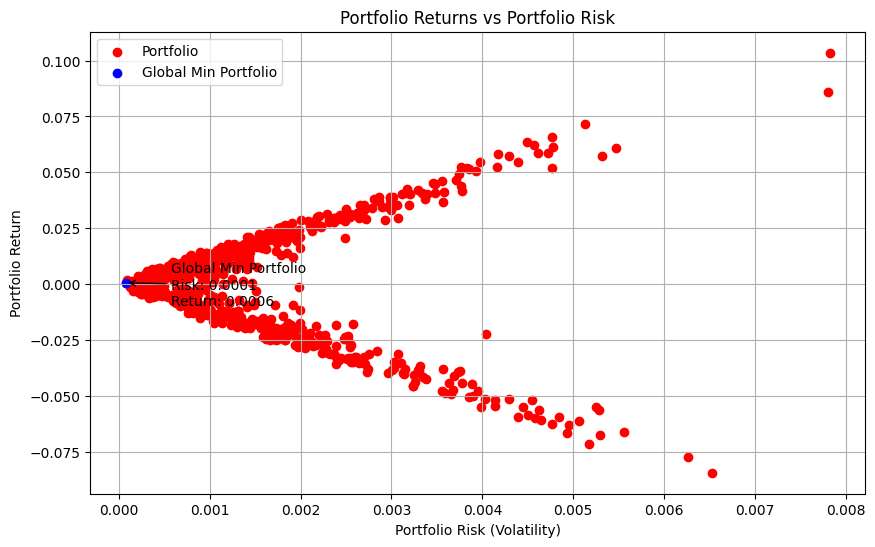

In [33]:
import matplotlib.pyplot as plt

# Extract portfolio returns and portfolio risk from the DataFrame
portfolio_returns = log_returns['Portfolio_Return']
portfolio_risks = log_returns['Portfolio_Volatility']

# Find the index of the global minimum portfolio risk
global_min_portfolio_index = portfolio_risks.idxmin()

# Plot portfolio returns vs portfolio risk
plt.figure(figsize=(10, 6))
plt.scatter(portfolio_risks, portfolio_returns,
            color='red',
            label='Portfolio')

plt.scatter(portfolio_risks[global_min_portfolio_index],
            portfolio_returns[global_min_portfolio_index],
            color='blue',
            label='Global Min Portfolio'
            )

plt.annotate('Global Min Portfolio\nRisk: {:.4f}\nReturn: {:.4f}'.format(portfolio_risks[global_min_portfolio_index],
                                                                         portfolio_returns[global_min_portfolio_index]
                                                                         ),
             xy=(portfolio_risks[global_min_portfolio_index],
                 portfolio_returns[global_min_portfolio_index]
                 ),

             xytext=(portfolio_risks[global_min_portfolio_index] + 0.0005,
                     portfolio_returns[global_min_portfolio_index] - 0.01
                     ),

             arrowprops=dict(facecolor='black',
                             arrowstyle='->')
             )

plt.title('Portfolio Returns vs Portfolio Risk')
plt.xlabel('Portfolio Risk (Volatility)')
plt.ylabel('Portfolio Return')
plt.legend()
plt.grid(True)
plt.show()

g. Show how the portfolio depends on each of the factors in FF3.

Sort the dataset

In [34]:
# Merge the two dataframes on the 'Date' column
merged_data_three_factor_portfolio = pd.merge(log_returns,
                                              factor_returns_three,
                                              on='Date',
                                              how='inner'
                                              )

# Drop rows with missing values
merged_data_three_factor_portfolio.dropna(inplace=True)

Perform regression with portfolio returns as response variable

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, RANSACRegressor
import numpy as np

# Assuming 'X' contains the independent variables and 'y' contains the target variable
X = merged_data_three_factor_portfolio[['Mkt-RF', 'SMB', 'HML']]
y = merged_data_three_factor_portfolio['Portfolio_Return']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42
                                                    )

# Fit Least Squares (LS) Regression model
model_ls = LinearRegression()
model_ls.fit(X_train, y_train)

# Fit Robust Regression (RANSAC) model
model_robust = RANSACRegressor()
model_robust.fit(X_train, y_train)

# Predictions
y_pred_ls = model_ls.predict(X_test)
y_pred_robust = model_robust.predict(X_test)

Interpret the results

In [36]:
import statsmodels.api as sm

# Convert the data types of input variables to numerical
X_train_numeric = X_train.apply(pd.to_numeric)
y_train_numeric = y_train.astype(float)

# Fit the linear regression model
model_ls = sm.OLS(y_train_numeric, sm.add_constant(X_train_numeric)).fit()

# Print the summary of the model
print("Least Squares Model Summary:")
print(model_ls.summary())

# Fit the robust regression model (e.g., RANSAC)
ransac_model = sm.RLM(y_train_numeric,
                      sm.add_constant(X_train_numeric),
                      M=sm.robust.norms.HuberT()
                      ).fit()

# Print the summary of the robust model
print("\nRobust Model Summary:")
print(ransac_model.summary())

Least Squares Model Summary:
                            OLS Regression Results                            
Dep. Variable:       Portfolio_Return   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     364.5
Date:                Thu, 02 May 2024   Prob (F-statistic):          1.26e-134
Time:                        17:18:21   Log-Likelihood:                 1686.0
No. Observations:                 603   AIC:                            -3364.
Df Residuals:                     599   BIC:                            -3346.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0002  

Predicted portfolio returns using the three factor

In [37]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Assuming 'X' contains the independent variables and 'y' contains the target variable
X_three_factor = merged_data_three_factor_portfolio[['Mkt-RF', 'SMB', 'HML']]
y_three_factor = merged_data_three_factor_portfolio['Portfolio_Return']

# Fit the linear regression model
model_ls_three_factor = LinearRegression()
model_ls_three_factor.fit(X_three_factor,
                          y_three_factor
                          )

# Predict returns using the trained model for the entire dataset
predicted_returns_three_factor = model_ls_three_factor.predict(X_three_factor)

# Append the predicted returns to the log_returns DataFrame
log_returns['Predicted_Portfolio_Return_Three_Factor'] = predicted_returns_three_factor


h. Show how the portfolio depends on each of the factors in FF5.

Sort the dataset

In [38]:
# Merge the two dataframes on the 'Date' column
merged_data_five_factor_portfolio = pd.merge(log_returns,
                                             factor_returns_five_copy,
                                             on='Date',
                                             how='inner'
                                             )

# Drop rows with missing values
merged_data_five_factor_portfolio.dropna(inplace=True)

Perform regression

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, RANSACRegressor
import numpy as np

# Assuming 'X' contains the independent variables and 'y' contains the target variable
X = merged_data_five_factor_portfolio[['Mkt-RF', 'SMB', 'HML','RMW','CMA']]
y = merged_data_five_factor_portfolio['Portfolio_Return']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42
                                                    )

# Fit Least Squares (LS) Regression model
model_ls = LinearRegression()
model_ls.fit(X_train, y_train)

# Fit Robust Regression (RANSAC) model
model_robust = RANSACRegressor()
model_robust.fit(X_train, y_train)

# Predictions
y_pred_ls = model_ls.predict(X_test)
y_pred_robust = model_robust.predict(X_test)

Interpret results

In [40]:
import statsmodels.api as sm

# Convert the data types of input variables to numerical
X_train_numeric = X_train.apply(pd.to_numeric)
y_train_numeric = y_train.astype(float)

# Fit the linear regression model
model_ls = sm.OLS(y_train_numeric,
                  sm.add_constant(X_train_numeric)
                  ).fit()

# Print the summary of the model
print("Least Squares Model Summary:")
print(model_ls.summary())

# Fit the robust regression model (e.g., RANSAC)
ransac_model = sm.RLM(y_train_numeric,
                      sm.add_constant(X_train_numeric),
                      M=sm.robust.norms.HuberT()
                      ).fit()

# Print the summary of the robust model
print("\nRobust Model Summary:")
print(ransac_model.summary())

Least Squares Model Summary:
                            OLS Regression Results                            
Dep. Variable:       Portfolio_Return   R-squared:                       0.677
Model:                            OLS   Adj. R-squared:                  0.675
Method:                 Least Squares   F-statistic:                     250.6
Date:                Thu, 02 May 2024   Prob (F-statistic):          5.35e-144
Time:                        17:18:54   Log-Likelihood:                 1713.9
No. Observations:                 603   AIC:                            -3416.
Df Residuals:                     597   BIC:                            -3389.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0004  

Predicted portfolio returns using five factor model

In [41]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Assuming 'X' contains the independent variables and 'y' contains the target variable
X_three_factor = merged_data_three_factor_portfolio[['Mkt-RF', 'SMB', 'HML']]
y_three_factor = merged_data_three_factor_portfolio['Portfolio_Return']

# Fit the linear regression model
model_ls_three_factor = LinearRegression()
model_ls_three_factor.fit(X_three_factor, y_three_factor)

# Predict returns using the trained model for the entire dataset
predicted_returns_three_factor = model_ls_three_factor.predict(X_three_factor)

# Append the predicted returns to the log_returns DataFrame
log_returns['Predicted_Portfolio_Return_Three_Factor'] = predicted_returns_three_factor

# Display the updated DataFrame
print(log_returns.head())

Ticker       Date      AAPL      AMZN      GOOG      MSFT      TSLA  \
0      2021-03-02 -0.021115 -0.016540 -0.002728 -0.013042 -0.045549   
1      2021-03-03 -0.024761 -0.029358 -0.023952 -0.027351 -0.049635   
2      2021-03-04 -0.015938 -0.009170  0.010982 -0.003654 -0.049844   
3      2021-03-05  0.010681  0.007658  0.028600  0.021252 -0.038532   
4      2021-03-08 -0.042567 -0.016300 -0.040836 -0.018345 -0.060227   

Ticker  Portfolio_Return  Portfolio_Volatility  \
0              -0.029085              0.002285   
1              -0.038033              0.003151   
2              -0.026694              0.002029   
3              -0.011854              0.001313   
4              -0.044299              0.003635   

Ticker  Predicted_Portfolio_Return_Three_Factor  
0                                     -0.023813  
1                                     -0.044197  
2                                     -0.036119  
3                                      0.021729  
4                     

The predicted portfolio returns vs actual portfolio returns

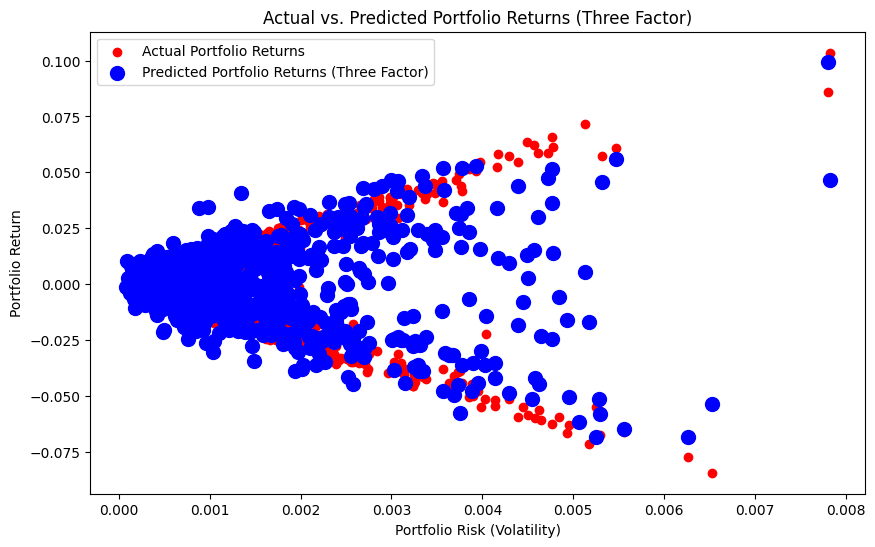

In [45]:
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(10, 6))

# Extract necessary data
portfolio_risks = log_returns['Portfolio_Volatility']
portfolio_returns = log_returns['Portfolio_Return']
predicted_returns_three_factor = log_returns['Predicted_Portfolio_Return_Three_Factor']

# Plot actual portfolio returns
plt.scatter(portfolio_risks,
            portfolio_returns,
            color='red',
            label='Actual Portfolio Returns'
            )

# Plot predicted portfolio returns using the three-factor model
plt.scatter(portfolio_risks,
            predicted_returns_three_factor,
            color='blue',
            label='Predicted Portfolio Returns (Three Factor)',
            marker='o',
            s=100
            )

# Add labels and legend
plt.xlabel('Portfolio Risk (Volatility)')
plt.ylabel('Portfolio Return')
plt.title('Actual vs. Predicted Portfolio Returns (Three Factor)')
plt.legend(loc='upper left')

# Show plot
plt.show()


Predict the portfolio returns using five factor

In [49]:
from sklearn.linear_model import LinearRegression

# Assuming 'X' contains the independent variables and 'y' contains the target variable
X_five_factor = merged_data_five_factor_portfolio[['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA']]
y_five_factor = merged_data_five_factor_portfolio['Portfolio_Return']

# Fit the linear regression model
model_ls_five_factor = LinearRegression()
model_ls_five_factor.fit(X_five_factor, y_five_factor)

# Predict returns using the trained model for the entire dataset
predicted_returns_five_factor = model_ls_five_factor.predict(X_five_factor)

# Append the predicted returns to the log_returns DataFrame
log_returns['Predicted_Portfolio_Return_Five_Factor'] = predicted_returns_five_factor

# Display the updated DataFrame
print(log_returns.head())


Ticker       Date      AAPL      AMZN      GOOG      MSFT      TSLA  \
0      2021-03-02 -0.021115 -0.016540 -0.002728 -0.013042 -0.045549   
1      2021-03-03 -0.024761 -0.029358 -0.023952 -0.027351 -0.049635   
2      2021-03-04 -0.015938 -0.009170  0.010982 -0.003654 -0.049844   
3      2021-03-05  0.010681  0.007658  0.028600  0.021252 -0.038532   
4      2021-03-08 -0.042567 -0.016300 -0.040836 -0.018345 -0.060227   

Ticker  Portfolio_Return  Portfolio_Volatility  \
0              -0.029085              0.002285   
1              -0.038033              0.003151   
2              -0.026694              0.002029   
3              -0.011854              0.001313   
4              -0.044299              0.003635   

Ticker  Predicted_Portfolio_Return_Three_Factor  \
0                                     -0.023813   
1                                     -0.044197   
2                                     -0.036119   
3                                      0.021729   
4                

Actual portfolio returns vs the predicted portfolio returns based from FF5

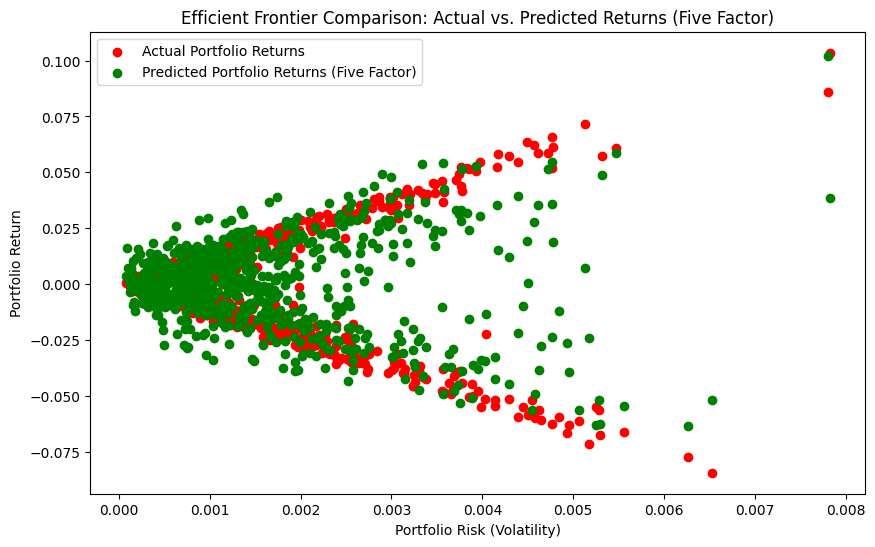

In [54]:
import matplotlib.pyplot as plt

# Increase plot size
plt.figure(figsize=(10, 6))

# Extract necessary data
portfolio_risks = log_returns['Portfolio_Volatility']
portfolio_returns = log_returns['Portfolio_Return']
predicted_returns_five_factor = log_returns['Predicted_Portfolio_Return_Five_Factor']

# Plot original efficient frontier
plt.scatter(portfolio_risks,
            portfolio_returns,
            color='red',
            label='Actual Portfolio Returns'
            )

# Plot efficient frontier based on predicted returns using the five-factor model
plt.scatter(portfolio_risks,
            predicted_returns_five_factor,
            color='green',
            label='Predicted Portfolio Returns (Five Factor)'
            )

# Add labels and legend
plt.xlabel('Portfolio Risk (Volatility)')
plt.ylabel('Portfolio Return')
plt.title('Efficient Frontier Comparison: Actual vs. Predicted Returns (Five Factor)')
plt.legend()

# Show plot
plt.show()


Comparing FF3,FF5 and Actual returns on time series

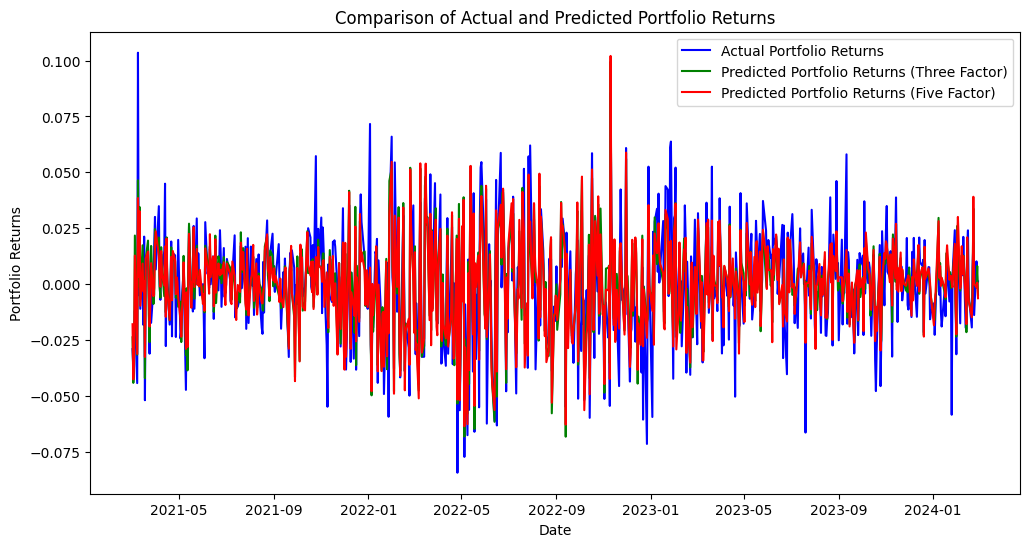

In [50]:
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(12, 6))

# Plot actual portfolio returns
plt.plot(log_returns['Date'],
         log_returns['Portfolio_Return'],
         label='Actual Portfolio Returns',
         color='blue'
         )

# Plot predicted portfolio returns from the three-factor model
plt.plot(log_returns['Date'],
         log_returns['Predicted_Portfolio_Return_Three_Factor'],
         label='Predicted Portfolio Returns (Three Factor)',
         color='green'
         )

# Plot predicted portfolio returns from the five-factor model
plt.plot(log_returns['Date'],
         log_returns['Predicted_Portfolio_Return_Five_Factor'],
         label='Predicted Portfolio Returns (Five Factor)',
         color='red'
         )

# Add labels and legend
plt.xlabel('Date')
plt.ylabel('Portfolio Returns')
plt.title('Comparison of Actual and Predicted Portfolio Returns')
plt.legend()

# Show plot
plt.show()
